In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [42]:
path = 'original_files/'
modified_path = 'modified_files/'
dataframes = ['accounts.csv', 'products.csv', 'sales_teams.csv']

## Add an ID column to the products, accounts, and sales_teams CSV files

In [43]:
for dataframe in dataframes:
    
    # Construct the full path to the CSV file
    full_path = path + dataframe
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(full_path)
    
    # Find the maximum index in the DataFrame and create a new range for IDs
    max_idx = df.index.max() + 1  # Get the maximum index and add 1 for ID generation
    id_values = np.arange(1, max_idx + 1, 1)  # Create an array of IDs starting from 1
    
    # Insert the new 'id' column at the beginning of the DataFrame
    df.insert(0, 'id', id_values)
    
    # Construct the save path for the modified CSV file
    save_path = modified_path + dataframe
    
    # Save the modified DataFrame back to a CSV file without the index
    df.to_csv(save_path, index=False)

## Create a dictionary with ID and full name for the products, accounts, and sales_teams CSV files
Goal: Prepare the data to replace records in sales_pipeline.csv

In [44]:
dict_name = ['accounts_dict', 'products_dict', 'teams_dict']

for i in range(len(dict_name)):
    # Assuming modified_path and dataframe are defined elsewhere
    full_path = modified_path + dataframes[i]
    df = pd.read_csv(full_path)

    # Create the dictionary from the DataFrame
    temp_dict = df.iloc[:, 1].to_dict()
    
    # Increment keys by 1 and convert to string keys
    temp_dict = {key + 1: value for key, value in temp_dict.items()}
    temp_dict = {str(key): value for key, value in temp_dict.items()}
    # Swap keys and values
    temp_dict = {value: key for key, value in temp_dict.items()}
    # Store the dictionary in the global namespace using the name from dict_name
    globals()[dict_name[i]] = temp_dict

print(products_dict)

{'GTX Basic': '1', 'GTX Pro': '2', 'MG Special': '3', 'MG Advanced': '4', 'GTX Plus Pro': '5', 'GTX Plus Basic': '6', 'GTK 500': '7'}


## Check for values in the dictionary that do not match the full names in sales_pipeline.csv

In [45]:
# Define the path to the sales pipeline CSV file
sales_pipeline_path = f'{path}sales_pipeline.csv'

# Read the sales pipeline data into a DataFrame
df_sales = pd.read_csv(sales_pipeline_path)

# Define a dictionary mapping column names to their corresponding dictionaries
data = {'product': products_dict, 'account': accounts_dict, 'sales_agent': teams_dict}

# Iterate over each column and its corresponding dictionary
for column, dict in data.items():
    print(f'Sales_pipeline column - {column}:')

    # Check for non-matching values in the sales pipeline column against the dictionary keys
    x = df_sales[~df_sales[column].isin(dict.keys())][column].unique()
    
    if len(x) != 0:
        # If there are non-matching values, print them
        print(f'Non matching values in sales_pipeline column: {x}.')

        # Check for any keys in the dictionary that are not present in the DataFrame's unique values
        for keys in dict.keys():
            y = df_sales[column].unique()  # Get unique values from the DataFrame column
            if keys not in y:
                # If a key from the dictionary is not found in the DataFrame's unique values, print it
                print(f'Non matching values in the dictionary: {keys}.')
    
    else:
        # If there are no non-matching values, print a message
        print(f'No missing values in the dictionary.')

Sales_pipeline column - product:
Non matching values in sales_pipeline column: ['GTXPro'].
Non matching values in the dictionary: GTX Pro.
Sales_pipeline column - account:
Non matching values in sales_pipeline column: [nan].
Sales_pipeline column - sales_agent:
No missing values in the dictionary.


In [46]:
# replace 'GTX Pro' to 'GTXPro'
products_dict['GTXPro'] = products_dict['GTX Pro']

del products_dict['GTX Pro']

## Replace full names in sales_pipeline.csv with IDs

In [47]:
for column, dict in data.items():
    df_sales[column] = df_sales[column].map(dict)

# Assuming df_sales is your sales pipeline DataFrame
df_sales = df_sales.rename(columns={
    'sales_agent': 'agent_id',
    'product': 'product_id',
    'account': 'account_id'
})

# Display the first few rows to verify the changes
print(df_sales.head())


  opportunity_id agent_id product_id account_id deal_stage engage_date  \
0       1C1I7A6R        5          6          9        Won  2016-10-20   
1       Z063OYW0       10          2         39        Won  2016-10-25   
2       EC4QE1BX       10          3          9        Won  2016-10-25   
3       MV1LWRNH        5          1         11        Won  2016-10-25   
4       PE84CX4O       33          1         35        Won  2016-10-25   

   close_date  close_value  
0  2017-03-01       1054.0  
1  2017-03-11       4514.0  
2  2017-03-07         50.0  
3  2017-03-09        588.0  
4  2017-03-02        517.0  


## Save changes to sales_pipeline.csv

In [48]:
df_sales.head()

,opportunity_id,agent_id,product_id,account_id,deal_stage,engage_date,close_date,close_value
0,1C1I7A6R,5,6,9,Won,2016-10-20,2017-03-01,1054.0
1,Z063OYW0,10,2,39,Won,2016-10-25,2017-03-11,4514.0
2,EC4QE1BX,10,3,9,Won,2016-10-25,2017-03-07,50.0
3,MV1LWRNH,5,1,11,Won,2016-10-25,2017-03-09,588.0
4,PE84CX4O,33,1,35,Won,2016-10-25,2017-03-02,517.0


In [49]:
# Display info about data
print(f"{df_sales.shape[0]} is number of rows")
print(f"{df_sales.shape[1]} is number of columns")
print(f"{df_sales.size} is number of data")

8800 is number of rows
8 is number of columns
70400 is number of data


In [50]:
df_sales.isnull().sum()

opportunity_id       0
agent_id             0
product_id           0
account_id        1425
deal_stage           0
engage_date        500
close_date        2089
close_value       2089
dtype: int64

In [51]:
# Display rows with any null values
rows_with_nulls = df_sales[df_sales.isnull().any(axis=1)]
rows_with_nulls

,opportunity_id,agent_id,product_id,account_id,deal_stage,engage_date,close_date,close_value
9,HAXMC4IX,30,4,NaN,Engaging,2016-11-03,NaN,NaN
25,UP409DSB,34,4,26,Engaging,2016-11-10,NaN,NaN
42,EG7OFLFR,32,1,NaN,Engaging,2016-11-14,NaN,NaN
44,OLVI7L8M,19,2,NaN,Engaging,2016-11-16,NaN,NaN
56,F5U1ACDD,32,6,NaN,Engaging,2016-11-19,NaN,NaN
...,...,...,...,...,...,...,...,...
8795,9MIWFW5J,3,4,NaN,Prospecting,NaN,NaN,NaN
8796,6SLKZ8FI,3,4,NaN,Prospecting,NaN,NaN,NaN
8797,LIB4KUZJ,3,4,NaN,Prospecting,NaN,NaN,NaN
8798,18IUIUK0,3,4,NaN,Prospecting,NaN,NaN,NaN


In [52]:
df_sales['deal_stage'].value_counts()

deal_stage
Won            4238
Lost           2473
Engaging       1589
Prospecting     500
Name: count, dtype: int64

In [53]:
#Display any row contain 'deal_stage:Prospecting' 
prospecting_rows = df_sales[df_sales['deal_stage'] == 'Prospecting']
prospecting_rows

,opportunity_id,agent_id,product_id,account_id,deal_stage,engage_date,close_date,close_value
8300,6CWZFOHJ,1,1,33,Prospecting,NaN,NaN,NaN
8301,3LCLVRVV,1,1,NaN,Prospecting,NaN,NaN,NaN
8302,YIU1B39V,1,1,NaN,Prospecting,NaN,NaN,NaN
8303,8E0VRCLW,1,1,NaN,Prospecting,NaN,NaN,NaN
8304,G99CS23F,1,1,NaN,Prospecting,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
8795,9MIWFW5J,3,4,NaN,Prospecting,NaN,NaN,NaN
8796,6SLKZ8FI,3,4,NaN,Prospecting,NaN,NaN,NaN
8797,LIB4KUZJ,3,4,NaN,Prospecting,NaN,NaN,NaN
8798,18IUIUK0,3,4,NaN,Prospecting,NaN,NaN,NaN


In [54]:
#Display any row contain 'deal_stage:Engaging' 
Engaging_rows = df_sales[df_sales['deal_stage'] == 'Engaging']
Engaging_rows

,opportunity_id,agent_id,product_id,account_id,deal_stage,engage_date,close_date,close_value
9,HAXMC4IX,30,4,NaN,Engaging,2016-11-03,NaN,NaN
25,UP409DSB,34,4,26,Engaging,2016-11-10,NaN,NaN
42,EG7OFLFR,32,1,NaN,Engaging,2016-11-14,NaN,NaN
44,OLVI7L8M,19,2,NaN,Engaging,2016-11-16,NaN,NaN
56,F5U1ACDD,32,6,NaN,Engaging,2016-11-19,NaN,NaN
...,...,...,...,...,...,...,...,...
8277,NGTVHTFH,22,2,NaN,Engaging,2017-12-19,NaN,NaN
8283,HB740BLB,26,3,63,Engaging,2017-12-20,NaN,NaN
8285,HCQK8NQ8,16,6,NaN,Engaging,2017-12-20,NaN,NaN
8286,RDHTQLNI,19,5,NaN,Engaging,2017-12-21,NaN,NaN


In [55]:
# Display rows with [close_date] null values
close_date_rows = df_sales[df_sales['close_date'].isnull()]
close_date_rows

,opportunity_id,agent_id,product_id,account_id,deal_stage,engage_date,close_date,close_value
9,HAXMC4IX,30,4,NaN,Engaging,2016-11-03,NaN,NaN
25,UP409DSB,34,4,26,Engaging,2016-11-10,NaN,NaN
42,EG7OFLFR,32,1,NaN,Engaging,2016-11-14,NaN,NaN
44,OLVI7L8M,19,2,NaN,Engaging,2016-11-16,NaN,NaN
56,F5U1ACDD,32,6,NaN,Engaging,2016-11-19,NaN,NaN
...,...,...,...,...,...,...,...,...
8795,9MIWFW5J,3,4,NaN,Prospecting,NaN,NaN,NaN
8796,6SLKZ8FI,3,4,NaN,Prospecting,NaN,NaN,NaN
8797,LIB4KUZJ,3,4,NaN,Prospecting,NaN,NaN,NaN
8798,18IUIUK0,3,4,NaN,Prospecting,NaN,NaN,NaN


In [56]:
accounts_rows = df_sales[df_sales['account_id'].isnull()]
accounts_rows

,opportunity_id,agent_id,product_id,account_id,deal_stage,engage_date,close_date,close_value
9,HAXMC4IX,30,4,NaN,Engaging,2016-11-03,NaN,NaN
42,EG7OFLFR,32,1,NaN,Engaging,2016-11-14,NaN,NaN
44,OLVI7L8M,19,2,NaN,Engaging,2016-11-16,NaN,NaN
56,F5U1ACDD,32,6,NaN,Engaging,2016-11-19,NaN,NaN
60,ZZY4516R,26,4,NaN,Engaging,2016-11-20,NaN,NaN
...,...,...,...,...,...,...,...,...
8795,9MIWFW5J,3,4,NaN,Prospecting,NaN,NaN,NaN
8796,6SLKZ8FI,3,4,NaN,Prospecting,NaN,NaN,NaN
8797,LIB4KUZJ,3,4,NaN,Prospecting,NaN,NaN,NaN
8798,18IUIUK0,3,4,NaN,Prospecting,NaN,NaN,NaN


In [57]:
#Filling rows is null of engage_date
df_sales['engage_date'] = df_sales['engage_date'].fillna(pd.to_datetime('1900-12-31').date())

In [58]:
df_sales['close_date'] = df_sales['close_date'].fillna(pd.to_datetime('1900-12-31').date())
df_sales['close_value'] = df_sales['close_value'].fillna(0)

In [59]:
df_sales['account_id'] = df_sales['account_id'].fillna(0)

In [60]:

# Dictionary to store DataFrames by their filenames (without .csv)
df_dict = {}

# Iterate over the file names, read each CSV into a DataFrame, store it in the dictionary, and display
for file in dataframes:
    # Create a name for each DataFrame from the file name (without .csv extension)
    df_name = file.split('.')[0]
    
    # Load the CSV into a DataFrame
    df_dict[df_name] = pd.read_csv(f"{modified_path}{file}")
    
    # Display the DataFrame in an interactive view (if in Jupyter)
    display(df_dict[df_name])
    
    # Print the name of the DataFrame after displaying it
    print(f"Displayed DataFrame: {df_name}\n")
    
    # Dynamically create variables (df_account, df_products, df_sales_teams) using globals()
    globals()[f'df_{df_name}'] = df_dict[df_name]

# Now you have variables: df_accounts, df_products, and df_sales_teams created dynamically

,id,account,sector,year_established,revenue,employees,office_location,subsidiary_of
0,1,Acme Corporation,technolgy,1996,1100.04,2822,United States,NaN
1,2,Betasoloin,medical,1999,251.41,495,United States,NaN
2,3,Betatech,medical,1986,647.18,1185,Kenya,NaN
3,4,Bioholding,medical,2012,587.34,1356,Philipines,NaN
4,5,Bioplex,medical,1991,326.82,1016,United States,NaN
...,...,...,...,...,...,...,...,...
80,81,Zathunicon,retail,2010,71.12,144,United States,NaN
81,82,Zencorporation,technolgy,2011,40.79,142,China,NaN
82,83,Zoomit,entertainment,1992,324.19,978,United States,NaN
83,84,Zotware,software,1979,4478.47,13809,United States,NaN


Displayed DataFrame: accounts



,id,product,series,sales_price
0,1,GTX Basic,GTX,550
1,2,GTX Pro,GTX,4821
2,3,MG Special,MG,55
3,4,MG Advanced,MG,3393
4,5,GTX Plus Pro,GTX,5482
5,6,GTX Plus Basic,GTX,1096
6,7,GTK 500,GTK,26768


Displayed DataFrame: products



,id,sales_agent,manager,regional_office
0,1,Anna Snelling,Dustin Brinkmann,Central
1,2,Cecily Lampkin,Dustin Brinkmann,Central
2,3,Versie Hillebrand,Dustin Brinkmann,Central
3,4,Lajuana Vencill,Dustin Brinkmann,Central
4,5,Moses Frase,Dustin Brinkmann,Central
5,6,Jonathan Berthelot,Melvin Marxen,Central
6,7,Marty Freudenburg,Melvin Marxen,Central
7,8,Gladys Colclough,Melvin Marxen,Central
8,9,Niesha Huffines,Melvin Marxen,Central
9,10,Darcel Schlecht,Melvin Marxen,Central


Displayed DataFrame: sales_teams



In [61]:
df_accounts.isnull().sum()

id                   0
account              0
sector               0
year_established     0
revenue              0
employees            0
office_location      0
subsidiary_of       70
dtype: int64

In [62]:
# Calculate the percentage of missing values and format them
missing_values = (df_accounts.isnull().sum() / df_accounts.shape[0]) * 100  # same code  'df_account.isnull().sum()/( len(df))*100'
missing_values = missing_values.round(2)  # Round to 2 decimal places
print(missing_values.astype(str) + '%')   # Add percentage sign

id                    0.0%
account               0.0%
sector                0.0%
year_established      0.0%
revenue               0.0%
employees             0.0%
office_location       0.0%
subsidiary_of       82.35%
dtype: object


In [63]:
#subsidiary_of: Parent company, if applicable
df_accounts['subsidiary_of'] = df_accounts['subsidiary_of'].fillna('Independent')

In [64]:
df_products.isnull().sum()

id             0
product        0
series         0
sales_price    0
dtype: int64

In [65]:
df_sales_teams.isnull().sum()

id                 0
sales_agent        0
manager            0
regional_office    0
dtype: int64

In [66]:
df_sales.isnull().sum()

opportunity_id    0
agent_id          0
product_id        0
account_id        0
deal_stage        0
engage_date       0
close_date        0
close_value       0
dtype: int64

In [67]:
df_sales.to_csv(f"{modified_path}sales_pipeline.csv", index=False)
df_accounts.to_csv(f"{modified_path}accounts.csv", index=False)
df_products.to_csv(f"{modified_path}products.csv", index=False)
df_sales_teams.to_csv(f"{modified_path}sales_teams.csv", index=False)

In [68]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   opportunity_id  8800 non-null   object 
 1   agent_id        8800 non-null   object 
 2   product_id      8800 non-null   object 
 3   account_id      8800 non-null   object 
 4   deal_stage      8800 non-null   object 
 5   engage_date     8800 non-null   object 
 6   close_date      8800 non-null   object 
 7   close_value     8800 non-null   float64
dtypes: float64(1), object(7)
memory usage: 550.1+ KB


# 1. Identifying Trends
This analysis will look at how sales performance changes over time, typically grouped by quarter or year.

In [69]:
# Convert 'close_date' to datetime
df_sales['close_date'] = pd.to_datetime(df_sales['close_date'])

# Extract year and quarter
df_sales['year'] = df_sales['close_date'].dt.year
df_sales['quarter'] = df_sales['close_date'].dt.quarter

# Group by year and quarter to analyze trends
sales_trends = df_sales.groupby(['year', 'quarter']).agg(
    total_revenue=('close_value', 'sum'),
    total_deals=('opportunity_id', 'count'),
    win_rate=('deal_stage', lambda x: (x == 'Won').mean() * 100)
).reset_index()

# Format the 'win_rate' column to 2 decimal places and add a percentage sign
sales_trends['win_rate'] = sales_trends['win_rate'].apply(lambda x: f"{x:.2f}%")

# Display the updated DataFrame
print(sales_trends)


   year  quarter  total_revenue  total_deals win_rate
0  1900        4            0.0         2089    0.00%
1  2017        1      1134672.0          647   82.07%
2  2017        2      3086111.0         2032   61.71%
3  2017        3      2982255.0         2047   61.41%
4  2017        4      2802496.0         1985   60.25%


## 2. Sales Team Performance Visualization:
A bar plot showing the total revenue generated by each sales agent or team.

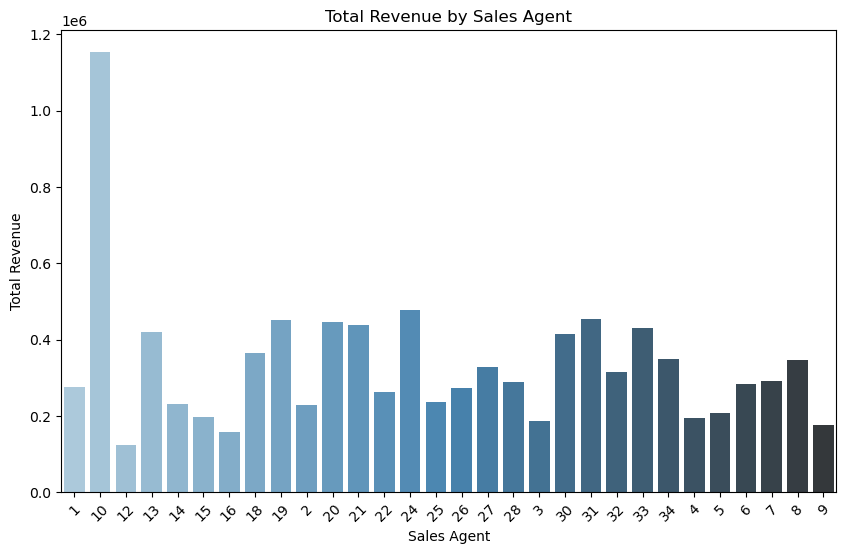

In [70]:
# Bar plot: Total revenue by sales agent
plt.figure(figsize=(10, 6))
sns.barplot(x='agent_id', y='total_revenue', data=sales_team_performance, hue='agent_id', palette='Blues_d', legend=False)
plt.title('Total Revenue by Sales Agent')
plt.xlabel('Sales Agent')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


## 3. Sales Agent Productivity Visualization:
A horizontal bar plot showing the win rate for each sales agent.

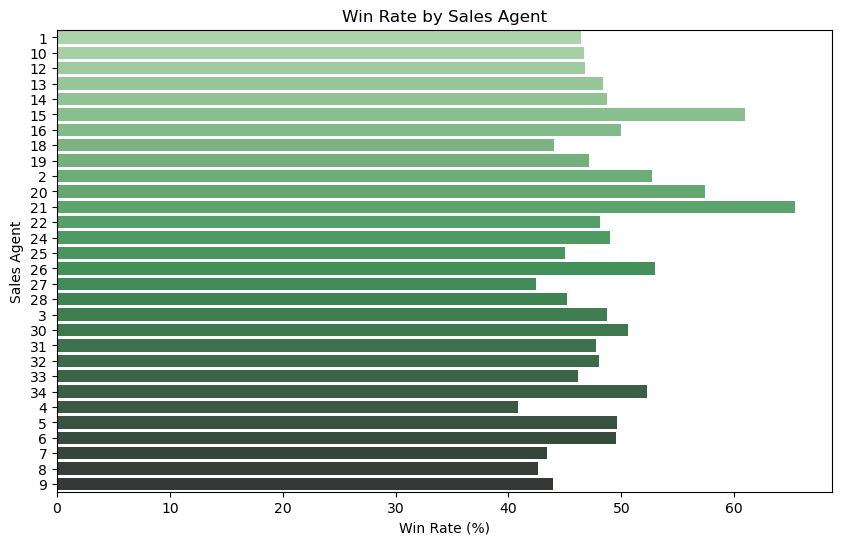

In [77]:
# Horizontal bar plot: Win rate by sales agent
plt.figure(figsize=(10, 6))
sns.barplot(x='win_rate', y='agent_id', data=sales_team_performance, hue='agent_id', palette='Greens_d', legend=False)
plt.title('Win Rate by Sales Agent')
plt.xlabel('Win Rate (%)')
plt.ylabel('Sales Agent')
plt.show()


## 4. Sales Trends Over Time:
A line plot showing total revenue over time (grouped by year and quarter).

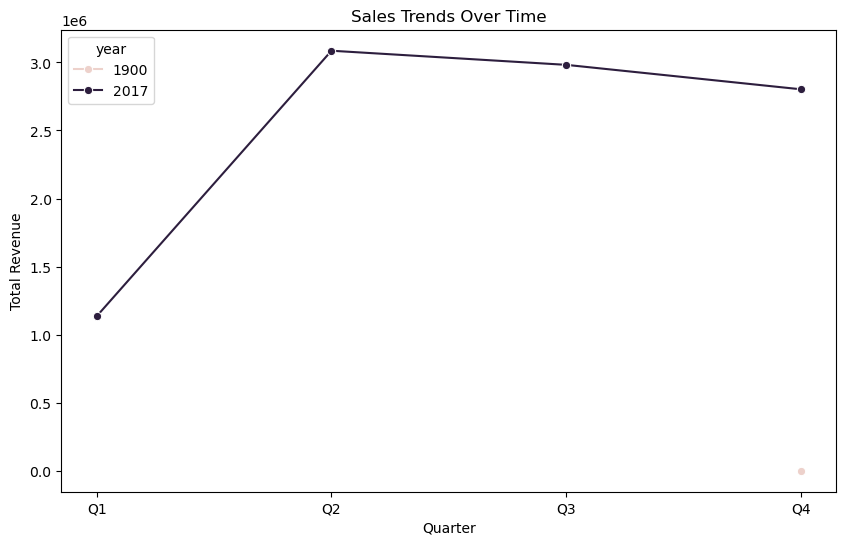

In [78]:
# Line plot: Sales trends over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='quarter', y='total_revenue', hue='year', data=sales_trends, marker='o')
plt.title('Sales Trends Over Time')
plt.xlabel('Quarter')
plt.ylabel('Total Revenue')
plt.xticks([1, 2, 3, 4], ['Q1', 'Q2', 'Q3', 'Q4'])
plt.show()
